# 가설 : 중국 관광객의 20대,30대는 관광지출 항목 중 쇼핑비는 다른 지출 항목에 비해 유의미하게 높은 영향을 미칠 것이다.

##1. 데이터 전처리

In [80]:
import pandas as pd

In [81]:
pd.set_option('display.max_columns', None)

In [82]:
data24 = pd.read_csv('/content/drive/MyDrive/DATATON/TOUR/data/외래관광객조사_DATA_2024.csv')
data24

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,Q2a2,Q2a3,Q2a_dk,Q2_1a1,Q2_1a2,Q2_1a3,ZQ2_31,ZQ2_32,ZQ2_33,ZQ2_34,Q2_3a2at,Q2_3a2bt,Q2_3a2ct,Q2_3a2dt,Q2_3a2et,Q2_3a3at,Q2_3a3bt,Q2_3a3ct,Q2_3a3dt,Q2_3a3et,Q2_3b2a,Q2_3b2b,Q2_3b2c,Q2_3b2d,Q2_3b2e,Q2_3b3a,Q2_3b3b,Q2_3b3c,Q2_3b3d,Q2_3b3e,Q3_1a1,Q3_1a2,Q3_1a3,Q3_2a1,Q3_2a2,Q3_2a3,Q4a1,Q4a2,Q4a3,Q4a_dk,Q4_1a1,Q4_1a2,Q4_1a3,Q4_2a1,Q4_2a2,Q4_2a3,Q4_2a_dk,Q5,Q5_1a01,Q5_1a02,Q5_1a03,Q5_1a04,Q5_1a05,Q5_1a06,Q5_1a07,Q5_1a08,Q5_1a09,Q5_1a10,Q5_1a_dk,Q6,Q6_1,Q6_1R,Q7A,Q7a_dk,Q7a2,Q7a3,Q7a4,Q7a5,Q7a6,Q7a7,Q7a8,MQ7_1,MQ7_1제외,MQ7_2,MQ7_1$15제외,MQ7_1제외$15제외,RQ7_1,RQ7_1제외,RQ7_2,RQ7_1$15제외,RQ7_1제외$15제외,Q8a01,Q8a02,Q8a03,Q8a04,Q8a05,Q8a06,Q8a07,Q8a08,Q8a09,Q8a10,Q8a11,Q8a12,Q8a13,Q8a14,Q8a15,Q8a16,Q8a17,Q8a18,Q8a19,Q8a20,Q8_1a1,Q8_1a2,Q8_1a3,Q9_1_1,Q9_1_2,Q9_1_3,Q9_1_4,Q9_1_5,Q9_2a01,Q9_2a02,Q9_2a03,Q9_2a04,Q9_2a05,Q9_2a06,Q9_2a07,Q9_2a08,Q9_2a09,Q9_2a10,Q9_2a11,Q9_2a12,Q9_2a13,Q9_2a14,Q9_2a15,Q9_2a16,Q9_2a17,KWON1,KWON2,KWON3,KWON4,KWON5,KWON6,KWON7,KWON8,KWONA1,KWONA2,KWONA3,KWONB1,KWONB2,M박HAP,M일HAP,M일HAP_61,R일HAP,서울박TOT,경기박TOT,인천박TOT,강원박TOT,대전박TOT,충북박TOT,충남박TOT,세종박TOT,경북박TOT,경남박TOT,대구박TOT,울산박TOT,부산박TOT,광주박TOT,전북박TOT,전남박TOT,제주박TOT,서울일TOT,경기일TOT,인천일TOT,강원일TOT,대전일TOT,충북일TOT,충남일TOT,세종일TOT,경북일TOT,경남일TOT,대구일TOT,울산일TOT,부산일TOT,광주일TOT,전북일TOT,전남일TOT,제주일TOT,서울박60,경기박60,인천박60,강원박60,대전박60,충북박60,충남박60,세종박60,경북박60,경남박60,대구박60,울산박60,부산박60,광주박60,전북박60,전남박60,제주박60,서울일61,경기일61,인천일61,강원일61,대전일61,충북일61,충남일61,세종일61,경북일61,경남일61,대구일61,울산일61,부산일61,광주일61,전북일61,전남일61,제주일61,WQ9_5a01,WQ9_5a02,WQ9_5a03,WQ9_5a04,WQ9_5a05,WQ9_5a06,WQ9_5a07,WQ9_5a08,WQ9_5a09,WQ9_5a10,WQ9_5a11,WQ9_5a12,WQ9_5a13,WQ9_5a14,WQ9_5a15,WQ9_5a16,WQ9_5a17,Q9_5A1,Q9_5A2,Q9_5A3,Q9_5A4,Q9_5A5,Q9_5A6,Q9_5A7,Q9_5A8,Q9_5A9,호텔숙박,모텔숙박,콘도숙박,게스숙박,민박숙박,학교숙박,친척숙박,기타숙박,호텔숙박60,모텔숙박60,콘도숙박60,게스숙박60,민박숙박60,학교숙박60,친척숙박60,기타숙박60,총액1인TOT2,C총액1인TOT2,총액1인TOT_개별국제교통비제외2,C총액1인TOT_개별국제교통비제외2,MDAY전체TOT_RAW61,RDAY전체TOT_RAW61,MDAY전체_개별국제교통비제외61,RDAY전체_개별국제교통비제외61,MDAY개별대체61,MDAY에어대체61,MDAY단체대체61,RDAY개별대체61,RDAY에어대체61,RDAY단체대체61,MDAY개별대체_개별국제교통비제외61,MDAY에어대체_개별국제교통비제외61,MDAY단체대체_개별국제교통비제외61,RDAY개별대체_개별국제교통비제외61,RDAY에어대체_개별국제교통비제외61,RDAY단체대체_개별국제교통비제외61,여행사1인대체,가이드1인대체,숙박비1인대체,음식점1인대체,식음료1인대체,국제한국1인대체,국제국외1인대체,국제수상1인대체,한국한국1인대체,한국국외1인대체,한국수상1인대체,한국철도1인대체,한국도로1인대체,대여서1인대체,유류비1인대체,문화서1인대체,오락및1인대체,쇼핑비1인대체,데이터1인대체,치료및1인대체,미용서1인대체,기타비1인대체,단기투어상품1인대체,C여행사1인대체,C가이드1인대체,C숙박비1인대체,C음식점1인대체,C식음료1인대체,C국제한국1인대체,C국제국외1인대체,C국제수상1인대체,C한국한국1인대체,C한국국외1인대체,C한국수상1인대체,C한국철도1인대체,C한국도로1인대체,C대여서1인대체,C유류비1인대체,C문화서1인대체,C오락및1인대체,C쇼핑비1인대체,C데이터1인대체,C치료및1인대체,C미용서1인대체,C기타비1인대체,C단기투어상품1인대체,Q10_2a01,Q10_2a02,Q10_2a03,Q10_2a04,Q10_2a05,Q10_2a06,Q10_2a07,Q10_2a08,Q10_2a09,Q10_2a10,Q10_2a11,Q10_2a12,Q10_2a13,MQ10_2b01,MQ10_2b02,MQ10_2b03,MQ10_2b04,MQ10_2b05,MQ10_2b06,MQ10_2b07,MQ10_2b08,MQ10_2b09,MQ10_2b10,MQ10_2b11,MQ10_2b12,MQ10_2b13,Q10_3a1,Q10_3a2,Q10_3a3,Q11,Q12a01,Q12a02,Q12a03,Q12a04,Q12a05,Q12a06,Q12a07,Q12a08,Q12a09,Q12a10,Q12a11,Q12a12,Q12a13,Q12a14,Q12a15,Q12a16,Q12a17,Q12a18,Q12a19,Q12a20,Q12a21,Q12a22,Q12a23,Q12a24,Q12a25,Q12a26,Q12a27,Q13,Q14,D_MON,D_BUN,D_NAT,D_NAT2,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight1,weight2,weight3,weight4,weight
0,57,5,4,5.0,1,1,7.0,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,3.0,10.0,6.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,11.0,6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,0.0,2.0,1.0,2,1.0,0.0,2.0,1.0,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3.0,NaN,11001,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,5,6,6.0,6,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,N

In [83]:
# ✅ D_NAT 매핑 및 필터링
mapping_nat = {
    1: 'China',
    2: 'Japan',
    3: 'Taiwan',
    5: 'Hong Kong'
}
mapping_age = {
    1: '10s',
    2: '20s',
    3: '30s',
    4: '40s',
    5: '50s',
    6: '60+'
}
mapping_sex = {
    1: 'male',
    2: 'female'
}
mapping_daymoney = {
    1: '50$ 이하',
    2: '50$ 초과 ~ 100$ 이하',
    3: '100$ 초과 ~ 300$ 이하',
    4: '300$ 초과 ~ 500$ 이하',
    5: '500$ 초과',
}
mapping_totalmoney = {
    1: '1000$ 이하',
    2: '1000$ 초과 ~ 2000$ 이하',
    3: '2000$ 초과 ~ 3000$ 이하',
    4: '3000$ 초과 ~ 5000$ 이하',
    5: '5000$ 초과 ~ 10000$ 이하',
    6: '10000$ 초과',
}


data24['D_NAT'] = data24['D_NAT'].map(mapping_nat)
data24['D_AGE'] = data24['D_AGE'].map(mapping_age)
data24['D_SEX'] = data24['D_SEX'].map(mapping_sex)
data24['RDAY전체TOT_RAW61'] = data24['RDAY전체TOT_RAW61'].map(mapping_daymoney)
data24['C총액1인TOT2'] = data24['C총액1인TOT2'].map(mapping_totalmoney)

data24 = data24.dropna(subset=['D_NAT']).reset_index(drop=True)


In [84]:
# 쇼핑 항목명 매핑
shopping_cols = {
    'Q10_2a01': '향수·화장품',
    'Q10_2a02': '식료품(김치·김·과자 등)',
    'Q10_2a03': '의류',
    'Q10_2a04': '신발류',
    'Q10_2a05': '가방류',
    'Q10_2a06': '보석·악세서리',
    'Q10_2a07': '인삼·한약재',
    'Q10_2a08': '주류',
    'Q10_2a09': '담배',
    'Q10_2a10': '전통민예품·칠기·목각제품',
    'Q10_2a11': '한류스타관련상품(앨범·포토카드·굿즈 등)',
    'Q10_2a12': '전자제품',
    'Q10_2a13': '기타'
}

shopping_cols_rate = {
    'MQ10_2b01': '향수·화장품_비중',
    'MQ10_2b02': '식료품(김치·김·과자 등)_비중',
    'MQ10_2b03': '의류_비중',
    'MQ10_2b04': '신발류_비중',
    'MQ10_2b05': '가방류_비중',
    'MQ10_2b06': '보석·악세서리_비중',
    'MQ10_2b07': '인삼·한약재_비중',
    'MQ10_2b08': '주류_비중',
    'MQ10_2b09': '담배_비중',
    'MQ10_2b10': '전통민예품·칠기·목각제품_비중',
    'MQ10_2b11': '한류스타관련상품(앨범·포토카드·굿즈 등)_비중',
    'MQ10_2b12': '전자제품_비중',
    'MQ10_2b13': '기타_비중'
}



data24 = data24.rename(columns=shopping_cols)
data24 = data24.rename(columns=shopping_cols_rate)


In [85]:
cols = [
    '여행사1인대체',
    '숙박비1인대체',
    '단기투어상품1인대체'
]

cols2 = [
'향수·화장품', '식료품(김치·김·과자 등)', '의류', '신발류', '가방류',
       '보석·악세서리', '인삼·한약재', '주류', '담배', '전통민예품·칠기·목각제품',
       '한류스타관련상품(앨범·포토카드·굿즈 등)', '전자제품', '기타'
]

data24[cols] = data24[cols].fillna(0)
data24.loc[:, '여행사1인대체':'단기투어상품1인대체'].isnull().sum()

data24[cols2] = data24[cols2].fillna(0)

In [86]:
# 2️⃣ 개별 국제교통비 제외 총액
cols_international = ['국제한국1인대체', '국제국외1인대체', '국제수상1인대체']
for i in cols_international:
  print('그전 :',  data24_fin[i].isnull().sum())

for i in cols_international:
  data24_fin[i] = data24_fin[i].fillna(0)
  print('그후 : ', data24_fin[i].isnull().sum())

그전 : 152
그전 : 152
그전 : 152
그후 :  0
그후 :  0
그후 :  0


In [95]:
cols_tot2 = [
    '여행사1인대체', '가이드1인대체', '숙박비1인대체', '음식점1인대체',
    '식음료1인대체', '국제한국1인대체', '국제국외1인대체', '국제수상1인대체',
    '한국한국1인대체', '한국국외1인대체', '한국수상1인대체',
    '한국철도1인대체', '한국도로1인대체', '대여서1인대체', '유류비1인대체',
    '문화서1인대체', '오락및1인대체', '쇼핑비1인대체', '데이터1인대체',
    '치료및1인대체', '미용서1인대체', '기타비1인대체', '단기투어상품1인대체'
]

cols_tot2_not = [
    '여행사1인대체', '가이드1인대체', '숙박비1인대체', '음식점1인대체',
    '식음료1인대체',
    '한국한국1인대체', '한국국외1인대체', '한국수상1인대체',
    '한국철도1인대체', '한국도로1인대체', '대여서1인대체', '유류비1인대체',
    '문화서1인대체', '오락및1인대체', '쇼핑비1인대체', '데이터1인대체',
    '치료및1인대체', '미용서1인대체', '기타비1인대체', '단기투어상품1인대체','교통비'
]


# 3️⃣ 교통비 계산
data24['교통비'] = data24['총액1인TOT2'] - data24['총액1인TOT_개별국제교통비제외2']

In [96]:
merge1 = data24.loc[:,'pnid']
merge2= data24.loc[:,'D_NAT':'D_AGE']
merge3 = data24.loc[:,'총액1인TOT2':'총액1인TOT_개별국제교통비제외2']
merge4 = data24.loc[:,'교통비']
merge5 = data24.loc[:, '여행사1인대체':'단기투어상품1인대체']
merge6 = data24.loc[:,'향수·화장품_비중':'기타_비중']

data24_fin = pd.concat([merge1,merge2,merge3,merge4,merge5,merge6], axis=1)
data24_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6356 entries, 0 to 6355
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   pnid                       6356 non-null   int64  
 1   D_NAT                      6356 non-null   object 
 2   D_NAT2                     0 non-null      float64
 3   D_SEX                      6356 non-null   object 
 4   D_AGE                      6356 non-null   object 
 5   총액1인TOT2                   6356 non-null   float64
 6   C총액1인TOT2                  6356 non-null   object 
 7   총액1인TOT_개별국제교통비제외2         6356 non-null   float64
 8   교통비                        6356 non-null   float64
 9   여행사1인대체                    6356 non-null   float64
 10  가이드1인대체                    6356 non-null   float64
 11  숙박비1인대체                    6356 non-null   float64
 12  음식점1인대체                    6356 non-null   float64
 13  식음료1인대체                    6356 non-null   float

In [97]:
#가설에 맞게 추가 전처리
data24_fin = data24_fin[data24_fin['D_NAT']=='China']
data24_2030 = data24_fin[data24_fin['D_AGE'].isin(['20s', '30s'])]
data24_2030

,pnid,D_NAT,D_NAT2,D_SEX,D_AGE,총액1인TOT2,C총액1인TOT2,총액1인TOT_개별국제교통비제외2,교통비,여행사1인대체,가이드1인대체,숙박비1인대체,음식점1인대체,식음료1인대체,국제한국1인대체,국제국외1인대체,국제수상1인대체,한국한국1인대체,한국국외1인대체,한국수상1인대체,한국철도1인대체,한국도로1인대체,대여서1인대체,유류비1인대체,문화서1인대체,오락및1인대체,쇼핑비1인대체,데이터1인대체,치료및1인대체,미용서1인대체,기타비1인대체,단기투어상품1인대체,향수·화장품_비중,식료품(김치·김·과자 등)_비중,의류_비중,신발류_비중,가방류_비중,보석·악세서리_비중,인삼·한약재_비중,주류_비중,담배_비중,전통민예품·칠기·목각제품_비중,한류스타관련상품(앨범·포토카드·굿즈 등)_비중,전자제품_비중,기타_비중
2,60,China,NaN,male,20s,922.680,1000$ 이하,727.256097,195.423903,0.0,1.395885,279.177005,209.382753,0.000000,0.0,195.423903,0.0,0.0,0,0.0,69.794251,27.917700,0.0,0.0,0.0,0.0,139.588502,0.000000,0.0,0.0,0.0,0.000000,34,33,33,0,0,0,0,0,0,0,0,0,0
8,71,China,NaN,female,20s,726.960,1000$ 이하,544.869827,182.090173,0.0,1.400694,112.055491,112.055491,0.000000,0.0,182.090173,0.0,0.0,0,0.0,11.205549,21.010405,0.0,0.0,0.0,0.0,280.138728,7.003468,0.0,0.0,0.0,0.000000,34,33,33,0,0,0,0,0,0,0,0,0,0
15,86,China,NaN,male,20s,4333.800,3000$ 초과 ~ 5000$ 이하,4018.283093,315.516907,0.0,0.701149,175.287170,210.344604,35.057434,0.0,315.516907,0.0,0.0,0,0.0,35.057434,35.057434,0.0,0.0,0.0,0.0,3505.743407,21.034460,0.0,0.0,0.0,0.000000,34,33,33,0,0,0,0,0,0,0,0,0,0
16,87,China,NaN,female,20s,866.760,1000$ 이하,589.441171,277.318829,0.0,0.138659,166.391297,277.318829,0.000000,0.0,277.318829,0.0,0.0,0,0.0,27.731883,0.000000,0.0,0.0,0.0,0.0,27.731883,20.798912,0.0,0.0,0.0,69.329707,34,33,33,0,0,0,0,0,0,0,0,0,0
18,91,China,NaN,female,20s,4194.000,3000$ 초과 ~ 5000$ 이하,3904.858325,289.141675,0.0,1.445708,1301.137539,1445.708376,144.570838,0.0,289.141675,0.0,0.0,0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,867.425026,144.570838,0.0,0.0,0.0,0.000000,34,33,33,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6347,19268,China,NaN,female,30s,425.630,1000$ 이하,336.385000,89.245000,0.0,0.000000,82.380000,96.110000,0.000000,0.0,89.245000,0.0,0.0,0,0.0,0.000000,20.595000,0.0,0.0,0.0,0.0,82.380000,0.000000,0.0,0.0,0.0,54.920000,60,30,0,0,0,0,0,0,10,0,0,0,0
6348,19269,China,NaN,female,20s,645.310,1000$ 이하,557.004421,88.305579,0.0,0.000000,74.720105,135.854737,0.000000,0.0,88.305579,0.0,0.0,0,0.0,0.000000,13.585474,0.0,0.0,0.0,0.0,271.709474,6.792737,0.0,0.0,0.0,54.341895,40,0,20,0,0,30,0,0,10,0,0,0,0
6349,19270,China,NaN,male,30s,638.445,1000$ 이하,501.145000,137.300000,0.0,0.000000,205.950000,102.975000,0.000000,0.0,137.300000,0.0,0.0,0,0.0,0.000000,68.650000,0.0,0.0,0.0,0.0,102.975000,0.000000,0.0,0.0,0.0,20.595000,50,50,0,0,0,0,0,0,0,0,0,0,0
6350,19271,China,NaN,female,20s,631.580,1000$ 이하,495.169633,136.410367,0.0,0.000000,272.820734,136.410367,0.000000,0.0,136.410367,0.0,0.0,0,0.0,0.000000,13.641037,0.0,0.0,0.0,0.0,68.205184,4.092311,0.0,0.0,0.0,0.000000,100,0,0,0,0,0,0,0,0,0,0,0,0


### [데이터 원본]  
** 원 데이터 shape = 13216*402**  

### [전처리 결과]
1. 매핑 및 필터링 : 국가, 연령, 성별
2. 컬럼명 변경 : 쇼핑 항목
1. nan값 존재하며 이는 해당 컬럼에 해당되는 내용이 없었다는 걸 의미함
2. 0 으로 변경가능한지 본 결과 숫자 0의 경우 비중 컬럼들에서 0이 있는 것으로 보였으며 문자 0은 없어보였으나 nan값의 경우 숫자형인 경우가 많아서 문자형으로는 할 수 없음
  1. 문자형(C여행사1인대체,C숙박비1인대체)인 경우 '사용하지 않음'
  2. 숫자형 칼럼의 경우 0으로 변경


     
### [가설에 맞게 추가 전처리]
1. 나라를 중국으로 한정
2. 연령대를 2030으로 한정  

###-> 최종 데이터 shape = 1356*45

## 2. 시각화

In [98]:
#한글 글씨 폰트 설치
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
import pandas as pd
import numpy as np

### 시각화 1. 중국의 관광 지출품목 top 10
- 전체, 남성, 여성별로 보기

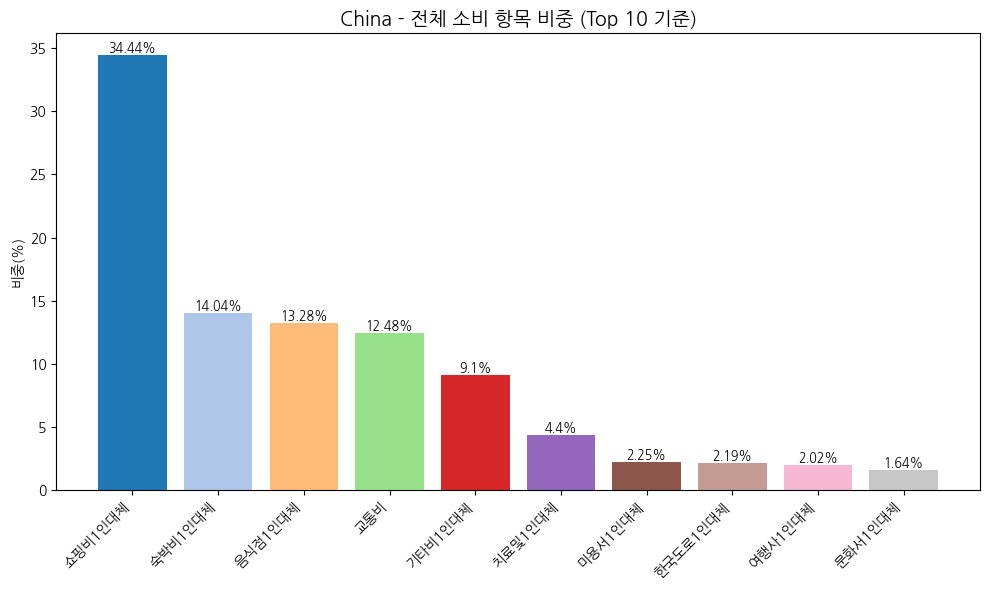

,비중(%)
쇼핑비1인대체,34.44
숙박비1인대체,14.04
음식점1인대체,13.28
교통비,12.48
기타비1인대체,9.10
치료및1인대체,4.40
미용서1인대체,2.25
한국도로1인대체,2.19
여행사1인대체,2.02
문화서1인대체,1.64


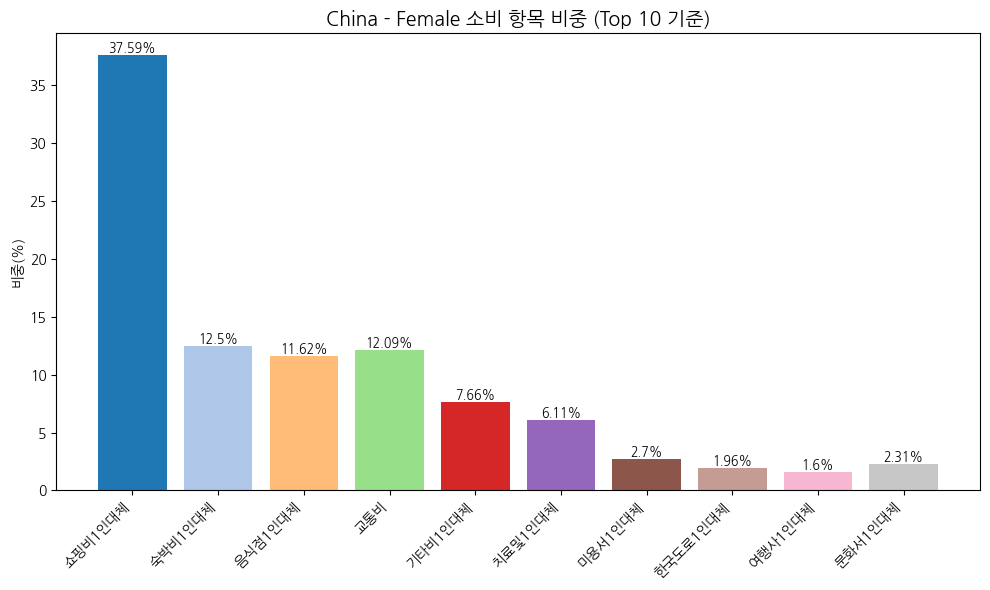

,비중(%)
쇼핑비1인대체,37.59
숙박비1인대체,12.50
음식점1인대체,11.62
교통비,12.09
기타비1인대체,7.66
치료및1인대체,6.11
미용서1인대체,2.70
한국도로1인대체,1.96
여행사1인대체,1.60
문화서1인대체,2.31


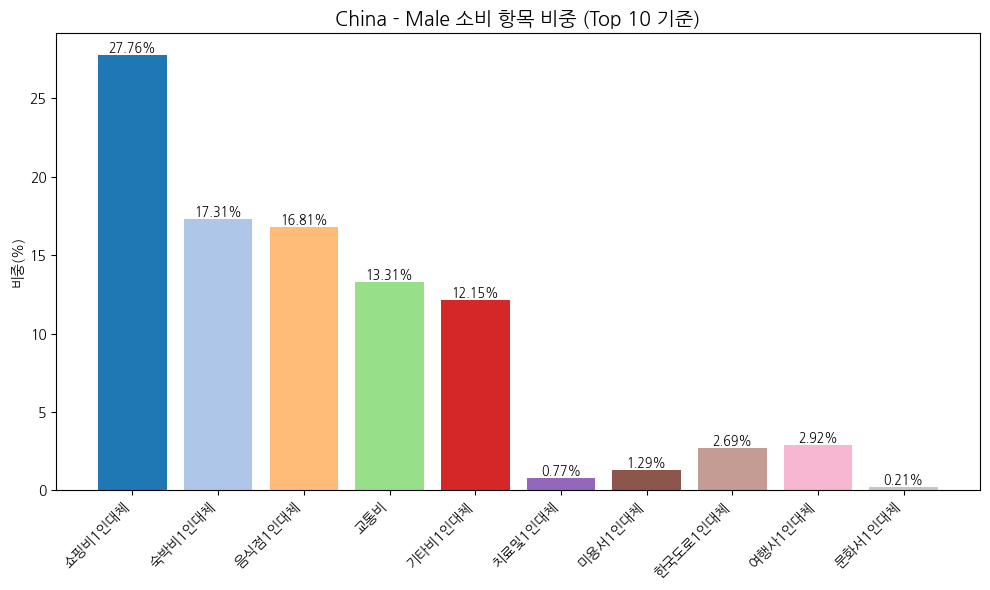

,비중(%)
쇼핑비1인대체,27.76
숙박비1인대체,17.31
음식점1인대체,16.81
교통비,13.31
기타비1인대체,12.15
치료및1인대체,0.77
미용서1인대체,1.29
한국도로1인대체,2.69
여행사1인대체,2.92
문화서1인대체,0.21


In [120]:
# 성별별 인덱스 맞춰서 데이터 불러오기
for nat, sex in targets:

    if sex == "all":
        # 전체는 성별 합산
        df_target = data24_2030[data24_2030["D_NAT"] == nat]
        df_sum = df_target[cols_tot2_not].sum()
        title_name = f"{nat} - 전체"
    else:
        df_target = grouped_age_sum[
            (grouped_age_sum["D_NAT"] == nat) &
            (grouped_age_sum["D_SEX"] == sex)
        ]
        if df_target.empty:
            print(f"❌ 데이터 없음: {nat} - {sex}")
            continue
        df_sum = df_target[cols_tot2_not].iloc[0]
        title_name = f"{nat} - {sex.capitalize()}"

    # 🔹 Top10 기준 항목만 추출
    df_top = df_sum[top10.index]

    # 🔹 비중 계산
    share = (df_top / df_sum.sum() * 100).round(2)

    #       시각화
    plt.figure(figsize=(10,6))
    bars = plt.bar(share.index, share.values, color=colors)

    for bar, pct in zip(bars, share):
        plt.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height(),
            f"{pct}%",
            ha='center', va='bottom', fontsize=9
        )

    plt.title(f"{title_name} 소비 항목 비중 (Top 10 기준)", fontsize=14)
    plt.ylabel("비중(%)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # 표 출력
    display(pd.DataFrame({"비중(%)": share}))


### [시각화1 지출내역 해석]  
중국관광객의 지출내역을 보면 숙박비, 숙박비, 음식점이 61.76%를 차지하고 있으며, 그 중 **쇼핑비가 가장 많은 비중을 차지하고 있다**  
성별로 보았을때도 남여 모두 쇼핑비>숙박비>음식점>교통비 순이다
다만 **여성의 경우 약 38%가 쇼핑비를 차지하고 있으며 쇼핑타겟대상**으로 활용할 수 있음을 알 수 있다

## 시각화2. 중국의 쇼핑비 지출품목 top 10
- 전체, 남성, 여성별로 보기

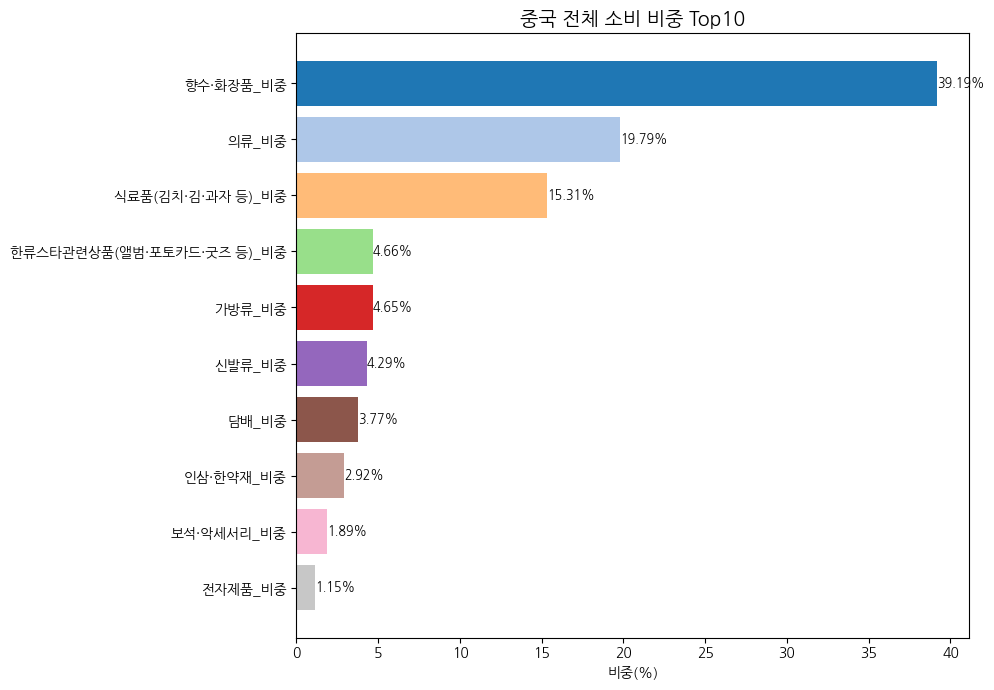


 중국 전체 소비 비중 Top10


,합계,비중(%)
향수·화장품_비중,47690,39.19
의류_비중,24087,19.79
식료품(김치·김·과자 등)_비중,18638,15.31
한류스타관련상품(앨범·포토카드·굿즈 등)_비중,5671,4.66
가방류_비중,5653,4.65
신발류_비중,5220,4.29
담배_비중,4594,3.77
인삼·한약재_비중,3555,2.92
보석·악세서리_비중,2305,1.89
전자제품_비중,1400,1.15


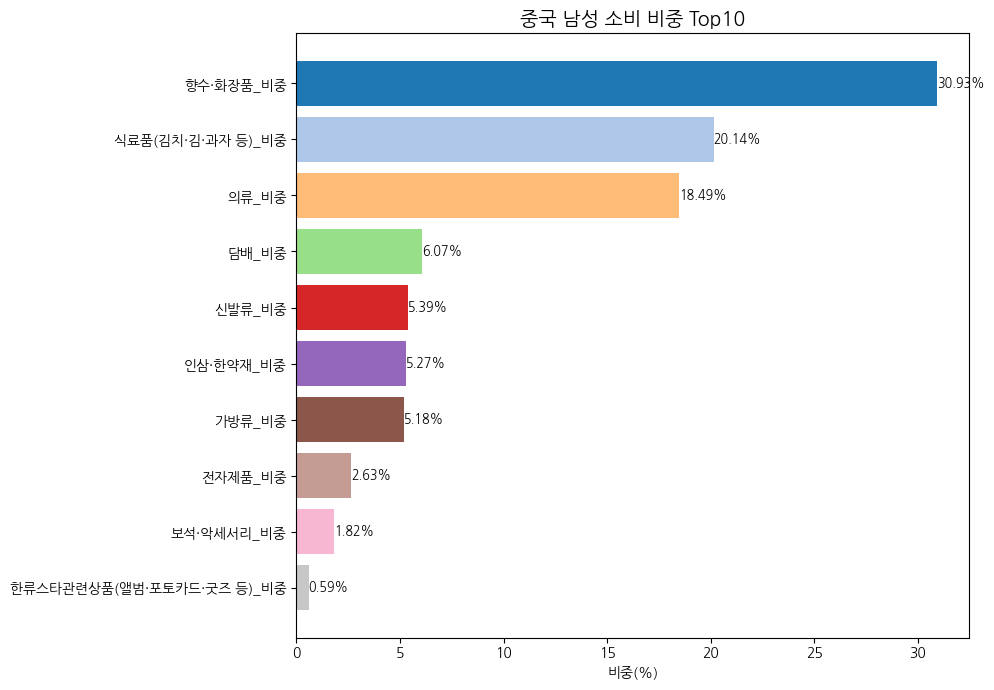


 중국 남성 소비 비중 Top10


,합계,비중(%)
향수·화장품_비중,10888,30.93
식료품(김치·김·과자 등)_비중,7088,20.14
의류_비중,6509,18.49
담배_비중,2137,6.07
신발류_비중,1897,5.39
인삼·한약재_비중,1855,5.27
가방류_비중,1823,5.18
전자제품_비중,925,2.63
보석·악세서리_비중,640,1.82
한류스타관련상품(앨범·포토카드·굿즈 등)_비중,208,0.59


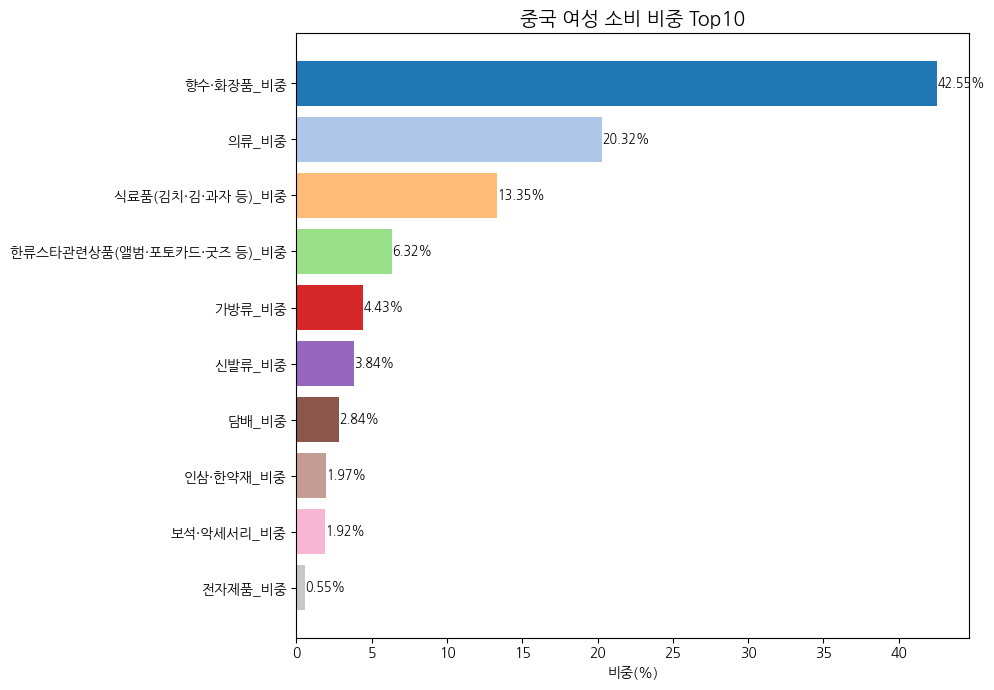


 중국 여성 소비 비중 Top10


,합계,비중(%)
향수·화장품_비중,36802,42.55
의류_비중,17578,20.32
식료품(김치·김·과자 등)_비중,11550,13.35
한류스타관련상품(앨범·포토카드·굿즈 등)_비중,5463,6.32
가방류_비중,3830,4.43
신발류_비중,3323,3.84
담배_비중,2457,2.84
인삼·한약재_비중,1700,1.97
보석·악세서리_비중,1665,1.92
전자제품_비중,475,0.55


In [116]:
# 🔹 사용할 컬럼
cols_used = ['향수·화장품_비중', '식료품(김치·김·과자 등)_비중', '의류_비중', '신발류_비중', '가방류_비중',
       '보석·악세서리_비중', '인삼·한약재_비중', '주류_비중', '담배_비중', '전통민예품·칠기·목각제품_비중',
       '한류스타관련상품(앨범·포토카드·굿즈 등)_비중', '전자제품_비중', '기타_비중']

# 시각화
for label, df in datasets:

    plt.figure(figsize=(10, 7))  # 개별 figure 생성

    sum_vals = df[cols_used].sum()

    # Top10 항목만 선택
    sum_top10 = sum_vals[top10_cols]

    # 비중 계산
    share = (sum_top10 / sum_vals.sum() * 100).round(2)

    # 🔹 소비비중에 따라 정렬 (내림차순)
    share = share.sort_values(ascending=False)

    # 🔹 그래프
    plt.barh(share.index, share.values, color=colors)

    # 값 표시
    for idx, val in enumerate(share.values):
        plt.text(val, idx, f"{val}%", va='center', ha='left', fontsize=9)

    plt.title(f"중국 {label} 소비 비중 Top10", fontsize=14)
    plt.xlabel("비중(%)")
    plt.gca().invert_yaxis()  # 내림차순 정렬이라 큰 값이 위로 오도록

    plt.tight_layout()
    plt.show()

    # 표 출력
    print(f"\n 중국 {label} 소비 비중 Top10")
    display(pd.DataFrame({"합계": sum_top10[share.index], "비중(%)": share}))


### [시각화2 쇼핑품목 해석]  
중국관광객의 쇼핑내역을 보면 향수화장품 비중, 의류 비중, 식료품 비중이 74.29%를 차지하고 있다. 그 중 향수화장품이 약 39%로 가장 많은 비중을 차지하고 있다
더하여 한류상품이 약 5%차지하고 있다

성별로 보았을때도 남여 모두 순위가 조금 다를뿐 향수화장품 비중, 식료품비중, 의류 비중이 top3에 차지하고 있다.

다만 남성의 경우 한류스타비중은많지 않으며 그보다는 담배, 신발의 비중이 크다 그에 반해 여성의 경우 한류상품이 약 6%로 쇼핑품목 4위에 차지하고 있다.

### 시각화1,2 인사이트
### 결론적으로 중국관관객의 경우 쇼핑비, 숙박비, 음식점비에 50%넘는 지출을 하고있고 그 중 쇼핑비가 가장 많은 지출비중을 차지한다.
### 쇼핑내역중에는 남녀모두 향수화장품, 의류, 식료품에 쇼핑을 하고 있으며 그 중 여성은 한류상품도 쇼핑의 고려대상임을 알 수 있다.
### 그렇기때문에 현재 많은 소비를 하고 있는 품목에 한류굿즈등 한류상품을 접목시킨다면 더 많은 소비를 할 것을 기대할 수 있다

## 3. 통계검정

### 시각화1 통계검정

In [129]:
from scipy.stats import ttest_ind

In [135]:
results_ttest = []

for col in cols_tot2_not:
    male_vals = df_male[col].dropna()
    female_vals = df_female[col].dropna()

    t_stat, p_val = ttest_ind(male_vals, female_vals, equal_var=False)

    results_ttest.append([col, t_stat, p_val])

df_ttest = pd.DataFrame(results_ttest, columns=["항목", "t-stat", "p-value"])
df_ttest["유의미함"] = df_ttest["p-value"] < 0.05

display(df_ttest)

significant_items = df_ttest[df_ttest["유의미함"] == True]["항목"]

print("⭐ 성별 차이가 유의미한 항목:")
display(significant_items)


,항목,t-stat,p-value,유의미함
0,여행사1인대체,1.518908,1.294686e-01,False
1,가이드1인대체,1.416823,1.572604e-01,False
2,숙박비1인대체,4.155710,3.796607e-05,True
3,음식점1인대체,4.615987,4.950034e-06,True
4,식음료1인대체,1.079131,2.809043e-01,False
5,한국한국1인대체,-0.300051,7.642276e-01,False
6,한국국외1인대체,NaN,NaN,False
7,한국수상1인대체,-1.660548,9.712605e-02,False
8,한국철도1인대체,-0.706399,4.801630e-01,False
9,한국도로1인대체,2.201528,2.817764e-02,True


⭐ 성별 차이가 유의미한 항목:


,항목
2,숙박비1인대체
3,음식점1인대체
9,한국도로1인대체
11,유류비1인대체
12,문화서1인대체
14,쇼핑비1인대체
15,데이터1인대체
16,치료및1인대체
20,교통비


In [134]:
results_anova = []

for col in cols_tot2_not:
    all_vals = df_all[col].dropna()
    male_vals = df_male[col].dropna()
    female_vals = df_female[col].dropna()

    F_stat, p_val = f_oneway(all_vals, male_vals, female_vals)

    results_anova.append([col, F_stat, p_val])

df_anova = pd.DataFrame(results_anova, columns=["항목", "F-stat", "p-value"])
df_anova["유의미함"] = df_anova["p-value"] < 0.05

display(df_anova)

significant_items = df_anova[df_anova["유의미함"] == True]["항목"]

print("⭐ 성별 차이가 유의미한 항목:")
display(significant_items)

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


,항목,F-stat,p-value,유의미함
0,여행사1인대체,2.130674,1.189562e-01,False
1,가이드1인대체,2.118855,1.203682e-01,False
2,숙박비1인대체,13.461325,1.522931e-06,True
3,음식점1인대체,16.670540,6.371872e-08,True
4,식음료1인대체,0.655733,5.191437e-01,False
5,한국한국1인대체,0.050355,9.508925e-01,False
6,한국국외1인대체,NaN,NaN,False
7,한국수상1인대체,0.616679,5.398097e-01,False
8,한국철도1인대체,0.265359,7.669504e-01,False
9,한국도로1인대체,4.269254,1.408647e-02,True


⭐ 성별 차이가 유의미한 항목:


,항목
2,숙박비1인대체
3,음식점1인대체
9,한국도로1인대체
11,유류비1인대체
12,문화서1인대체
14,쇼핑비1인대체
15,데이터1인대체
16,치료및1인대체
20,교통비


### 시각화 1 통계검정 결과
- T-TEST, ANOVA : p< 0.05
### **숙박비, 음식점, 한국도로1인대체, 유류비, 문화비, 쇼핑비, 데이터비, 치료비**가 T-TEST, ANOVA 결과 공통적으로 유의미하다

### 시각화2 통계검정

In [136]:
results_ttest = []

for col in cols_used:
    male_vals = df_male[col].dropna()
    female_vals = df_female[col].dropna()

    t_stat, p_val = ttest_ind(male_vals, female_vals, equal_var=False)

    results_ttest.append([col, t_stat, p_val])

df_ttest = pd.DataFrame(results_ttest, columns=["항목", "t-stat", "p-value"])
df_ttest["유의미함"] = df_ttest["p-value"] < 0.05

display(df_ttest)

significant_items = df_ttest[df_ttest["유의미함"] == True]["항목"]

print("⭐ 성별 차이가 유의미한 항목:")
display(significant_items)

,항목,t-stat,p-value,유의미함
0,향수·화장품_비중,-7.203747,1.300251e-12,True
1,식료품(김치·김·과자 등)_비중,3.267586,1.143563e-03,True
2,의류_비중,-2.036469,4.203876e-02,True
3,신발류_비중,1.383639,1.669204e-01,False
4,가방류_비중,0.380507,7.036692e-01,False
5,보석·악세서리_비중,-0.422531,6.727542e-01,False
6,인삼·한약재_비중,3.508148,4.891378e-04,True
7,주류_비중,3.665413,2.716046e-04,True
8,담배_비중,3.435281,6.306773e-04,True
9,전통민예품·칠기·목각제품_비중,0.041309,9.670583e-01,False


⭐ 성별 차이가 유의미한 항목:


,항목
0,향수·화장품_비중
1,식료품(김치·김·과자 등)_비중
2,의류_비중
6,인삼·한약재_비중
7,주류_비중
8,담배_비중
10,한류스타관련상품(앨범·포토카드·굿즈 등)_비중
11,전자제품_비중


In [137]:
results_anova = []

for col in cols_used:
    all_vals = df_all[col].dropna()
    male_vals = df_male[col].dropna()
    female_vals = df_female[col].dropna()

    F_stat, p_val = f_oneway(all_vals, male_vals, female_vals)

    results_anova.append([col, F_stat, p_val])

df_anova = pd.DataFrame(results_anova, columns=["항목", "F-stat", "p-value"])
df_anova["유의미함"] = df_anova["p-value"] < 0.05

display(df_anova)

significant_items = df_anova[df_anova["유의미함"] == True]["항목"]

print("⭐ 성별 차이가 유의미한 항목:")
display(significant_items)

,항목,F-stat,p-value,유의미함
0,향수·화장품_비중,24.200241,3.826084e-11,True
1,식료품(김치·김·과자 등)_비중,6.579441,1.410920e-03,True
2,의류_비중,2.088233,1.241053e-01,False
3,신발류_비중,1.092406,3.355562e-01,False
4,가방류_비중,0.071322,9.311640e-01,False
5,보석·악세서리_비중,0.090398,9.135703e-01,False
6,인삼·한약재_비중,9.135706,1.111050e-04,True
7,주류_비중,10.009193,4.667079e-05,True
8,담배_비중,7.247931,7.255299e-04,True
9,전통민예품·칠기·목각제품_비중,0.000720,9.992806e-01,False


⭐ 성별 차이가 유의미한 항목:


,항목
0,향수·화장품_비중
1,식료품(김치·김·과자 등)_비중
6,인삼·한약재_비중
7,주류_비중
8,담배_비중
10,한류스타관련상품(앨범·포토카드·굿즈 등)_비중
11,전자제품_비중


### 시각화 2 통계검정 결과
- T-TEST, ANOVA : p< 0.05
### **향수화장품, 식료품, 인삼한약재, 주류, 담배, 한류상품, 전자제품**이 T-TEST, ANOVA 결과 공통적으로 유의미하다

##최종 시각화 인사이트
- 시각화1 유의미한 인사이트 : 쇼핑비, 숙박비, 음식점
- 시각화1 유의미한 통계검정 : 숙박비, 음식점, 한국도로1인대체, 유류비, 문화비, 쇼핑비, 데이터비, 치료비  
- 시각화2 유의미한 인사이트 : 향수화장품, 식료품, 의류, 한류상품
- 시각화2 유의미한 통계검정 : 향수화장품, 식료품, 인삼한약재, 주류, 담배, 한류상품, 전자제품

### 시각화 및 통계검정 공통 인사이트
- 시각화1 : 쇼핑비, 숙박비, 음식점
- 시각화2 : 향수화장품, 식료품, 한류상품

## 최종 통계검정 및 시각화
### 지출비중중에는 쇼핑비, 숙박비, 음식점비가 가장 많은 지출을 하고 있으며,쇼핑비 중에는 향수화장품, 식료품이 많은 지출비중을 차지하고 있다.


## 마케팅 전개

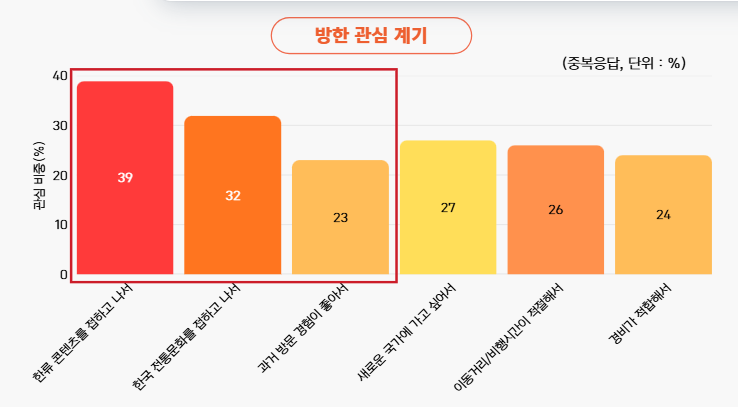

방한 관심 계기에 한류 콘텐츠 경험, 한국 전통문화 경험, 과거 방문 경험 등 한국적 경험을 경험한 사람이 방한한

## 마케팅 전략
### 쇼핑비, 숙박비, 음식점비를 지출할 때 한국적 경험을 할 수 있게 해주고 향수화장품, 식료품에 한류상품을 콜라보 하는 등으로 관심있고 선호하는 품목들을 유기적으로 연결하여 자연스러운 소비증대가 이루어지길  기대하며 마케팅 전략을 전개할것이다.